In [1]:
import random
import seaborn
import first_model
%matplotlib inline 
%run first_model.py
%load_ext autoreload
%autoreload 2

[INFO] This trial license of GraphLab Create is assigned to lax.cary@gmail.com and will expire on October 09, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-2104 - Server binary: /home/ubuntu/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1441915733.log
[INFO] GraphLab Server Version: 1.5.2


PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 329874 observations with 31301 users and 109 items.
PROGRESS:     Data prepared in: 0.154094s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 2        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | nmf                            | Use Non-Negative Factors               

In [146]:
athlete_ratings, segment_ratings, model = first_model.df_to_latent_features(df)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 329874 observations with 31301 users and 109 items.
PROGRESS:     Data prepared in: 0.138302s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | adagrad  |
PROGRESS: | nmf                            | Use Non-Negative Factors               

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c31b3d0d0>]], dtype=object)

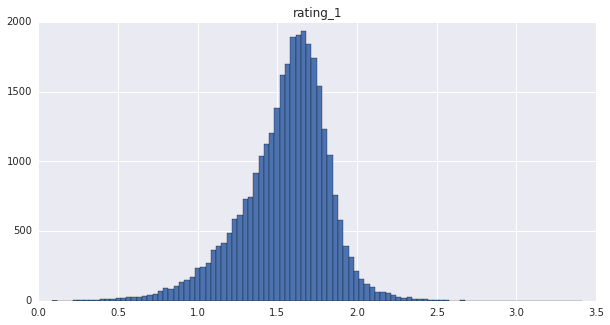

In [147]:
athlete_ratings.hist(bins=100, figsize=(10, 5))

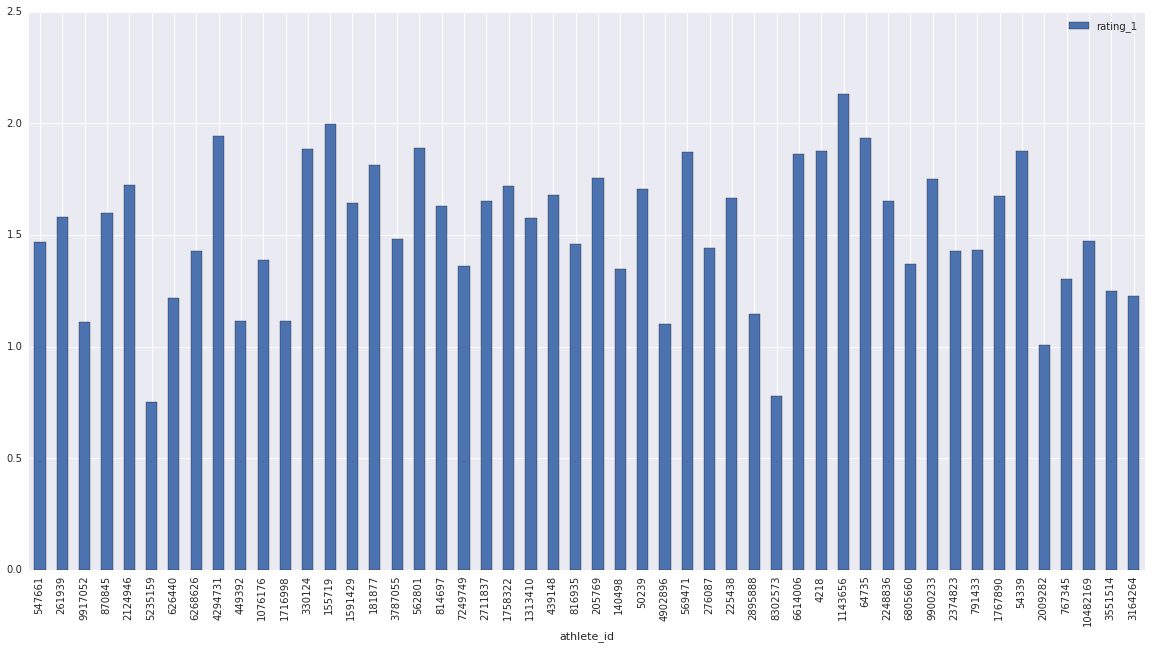

In [148]:
sample_athlete_ratings = athlete_ratings.ix[random.sample(athlete_ratings.index, 50)]
sample_athlete_ratings.plot(kind='bar', stacked='True', figsize=(20, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c3104ec10>]], dtype=object)

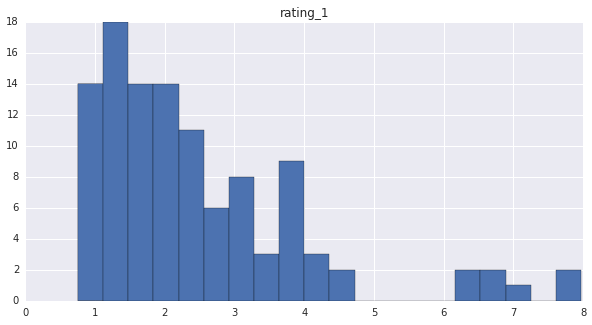

In [149]:
segment_ratings.hist(bins=20, figsize=(10, 5))

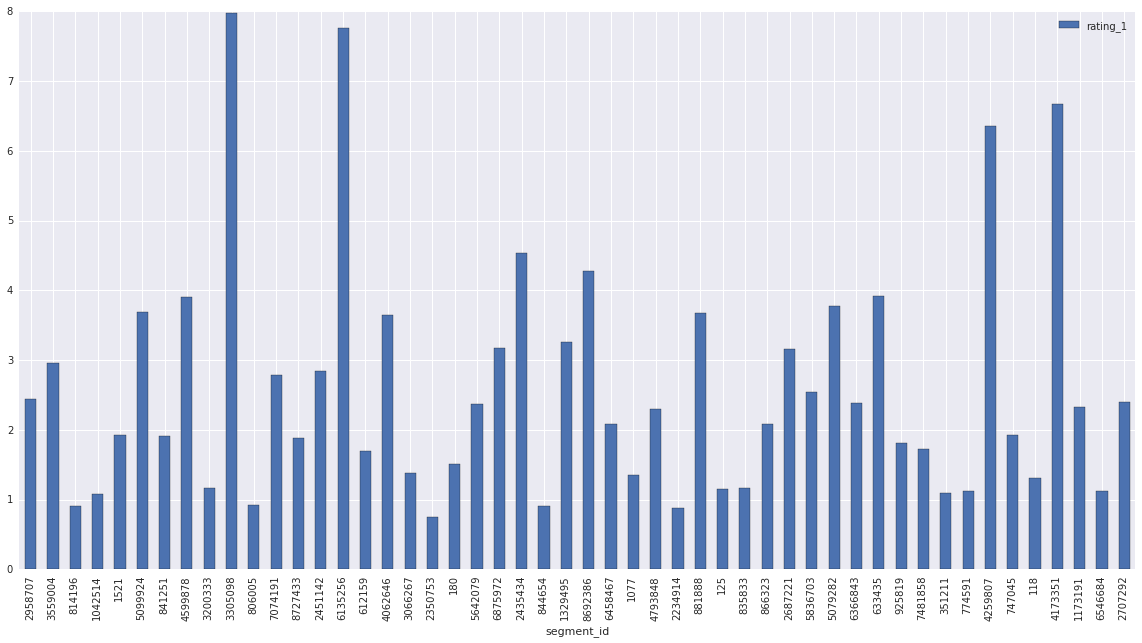

In [150]:
sample_segment_ratings = segment_ratings.ix[random.sample(segment_ratings.index, 50)]
sample_segment_ratings.plot(kind='bar', stacked='True', figsize=(20, 10))

In [152]:
segment_columns = ['seg_average_grade', 'seg_distance', 'seg_maximum_grade'] + list(segment_ratings.columns.values)
df.groupby('segment_id').first().merge(segment_ratings, right_index=True, left_index=True)[segment_columns].corr()

,seg_average_grade,seg_distance,seg_maximum_grade,rating_1
seg_average_grade,1.000000,0.120169,0.201205,-0.504288
seg_distance,0.120169,1.000000,0.060564,0.069213
seg_maximum_grade,0.201205,0.060564,1.000000,-0.212697
rating_1,-0.504288,0.069213,-0.212697,1.000000
